Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("train_ctrUa4K.csv")
df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

mojority of indivuals lives in semiubran

# Distibution analysis of numerical variables

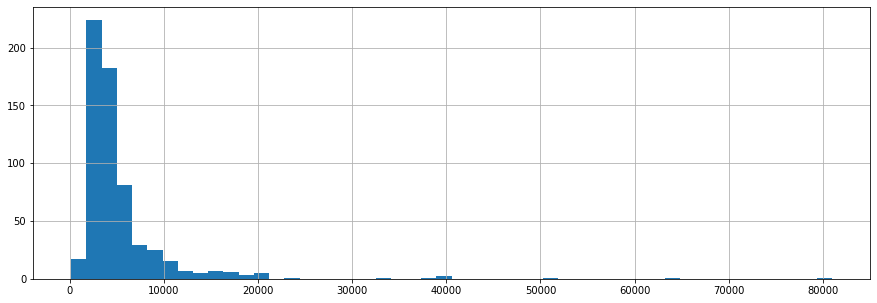

In [5]:
plt.figure(figsize=(15,5))
df['ApplicantIncome'].hist(bins=50)

Majority of individuals income is less than 10000

with few having an income above 20,000

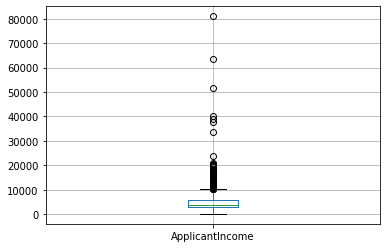

In [6]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in

the society. Part of this can be driven by the fact that we are looking at people with different education levels

### segregate people income by Education

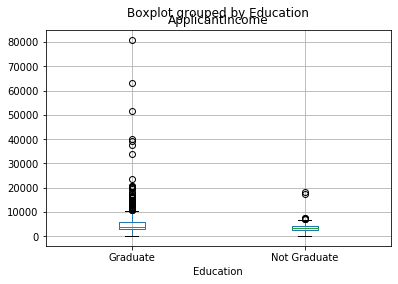

In [7]:
df.boxplot(column='ApplicantIncome',by='Education')

 There is no substantial different between the mean income of graduate and non-graduates. But there are a higher 
 
 number of graduates with very high incomes, which are appearing to be the outliers

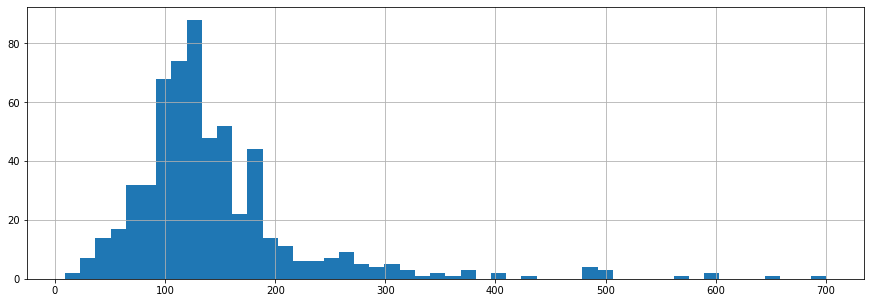

In [8]:
plt.figure(figsize=(15,5))
df['LoanAmount'].hist(bins=50)

few outliers in the amount of laon and maority of outliers are found from 100,200

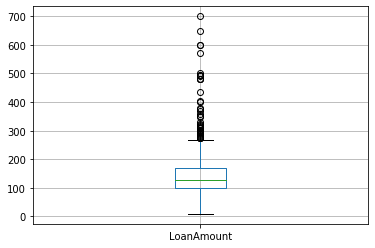

In [9]:
df.boxplot(column='LoanAmount')

It shows here their a a fair amount of outliers

## Dealing categorical data

In [10]:
temp=df['Credit_History'].value_counts(ascending=False)
temp

1.0    475
0.0     89
Name: Credit_History, dtype: int64

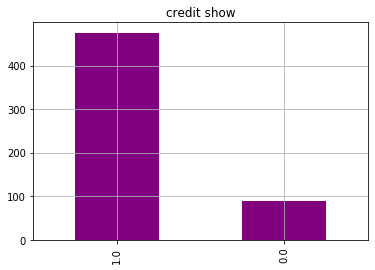

In [11]:
temp.plot(kind='bar',color='purple')
plt.title('credit show')
plt.grid()

Majority of individals their credit score valid  

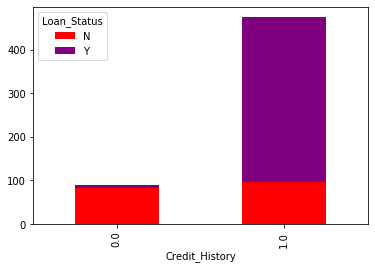

In [12]:
temp3=pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,colors={'purple','red'},grid=False)

# Data Munging

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

most missing values are credit_scores of the individuals

In [14]:
 df['LoanAmount'].fillna( df['LoanAmount'].mean(),inplace=True)

In [15]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since 500 values are “No”, it is safe to impute the missing values as “No” as there is a high probability of 

success

In [16]:
df['Self_Employed'].fillna('No',inplace=True)

In [17]:
table=df.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [18]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

###  How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

 The extreme values are practically possible, i.e. some people might apply for high value loans due to specific 
 
 needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:



In [19]:
df['LoanAmount1']=np.log(df['LoanAmount'])
df['LoanAmount1'].head()

0    4.986426
1    4.852030
2    4.189655
3    4.787492
4    4.948760
Name: LoanAmount1, dtype: float64

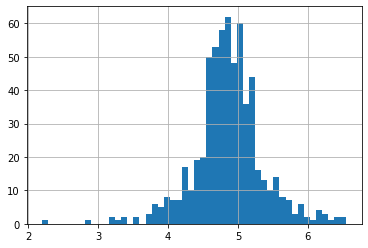

In [20]:
#to visualize
df['LoanAmount1'].hist(bins=50)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

 One intuition can be that some applicants have lower income but strong support Co-applicants. SO the best idea is   
 combine them and then get the log
 
    

In [21]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome1'] =np.log(df['TotalIncome'])
df['TotalIncome1'].head(3)

0    8.674026
1    8.714568
2    8.006368
Name: TotalIncome1, dtype: float64

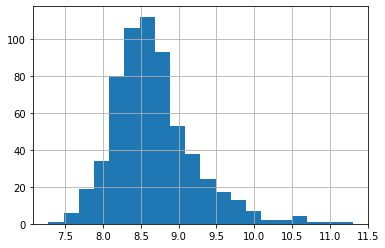

In [22]:
#drawing the distibution
df['TotalIncome1'].hist(bins=20)

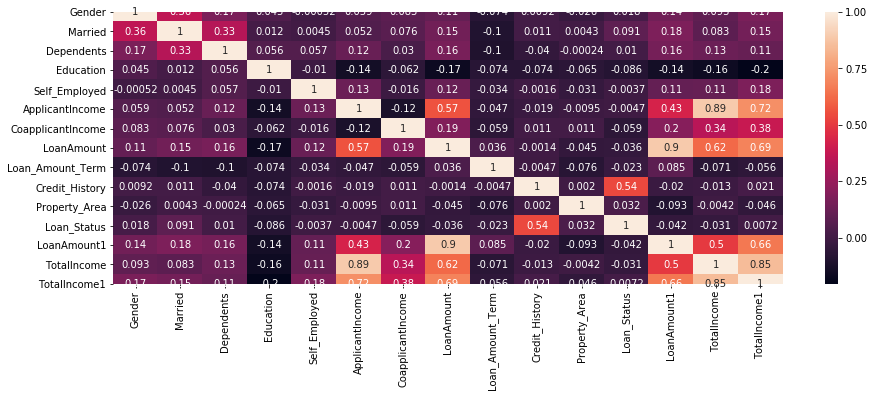

In [47]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

Loan status has a  correlation with the credit score

The distribution is much better than before

In [23]:
# df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Gender'].isnull().sum()

0

In [24]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [25]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount1          0
TotalIncome          0
TotalIncome1         0
dtype: int64

At this point our data is clean

## dealing with categolical data by label encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
var_mode=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in var_mode:
    df[i]=le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount1          float64
TotalIncome          float64
TotalIncome1         float64
dtype: object

In [29]:
df['Married']

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int64

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import KFold
  

### diffirencing between features and the traget

In [31]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount1,TotalIncome,TotalIncome1
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368


In [53]:
features=df.drop(['Loan_Status','Loan_ID'],axis=1)
features.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount1,TotalIncome,TotalIncome1
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,4.986426,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,4.852030,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,4.189655,3000.0,8.006368


In [54]:
target=df['Loan_Status']
target.head(3)

0    1
1    0
2    1
Name: Loan_Status, dtype: int64

### spliting the data into train and test


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [56]:
#use of logistc regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
lr.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [61]:
#checking for accurancy of the model
lr.score(x_test,y_test)*100

75.60975609756098

THe score above is not great 

we expected the score to increase with increase in features but that not the case here  so we got two obtion here 

  1 Explore other modeling techniques 
  
  2 Do feature engineeering


 ### Decision tree  which usually has a higher score than logistic regression in this categolical problem

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
dt.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [70]:
#accurancy
dt.score(x_test,y_test)*100

61.78861788617886

This score is relatively low and the best option left now is feature enginerring

This might be as the result of overfitting  or underfitting whereby our model is taking all the varaible and 

understanding the complex relationship and hence not genelarising well

In [126]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier()
rd.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
rd.predict(x_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [129]:
rd.score(x_test,y_test)*100

78.04878048780488

IT is an improvement of the two but not still the best score

In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [131]:
bestscore=SelectKBest(score_func=chi2,k=6)
fit=bestscore.fit(features,target)

In [132]:
dfscore=pd.DataFrame(fit.scores_)
dfscore

,0
0,0.036234
1,1.782425
2,0.085953
3,3.540502
4,0.007285
5,93.904964
6,11342.041603
7,39.211545
8,3.778554
9,26.005877


In [133]:
dfcolumns=pd.DataFrame(features.columns)
dfcolumns

,0
0,Gender
1,Married
2,Dependents
3,Education
4,Self_Employed
5,ApplicantIncome
6,CoapplicantIncome
7,LoanAmount
8,Loan_Amount_Term
9,Credit_History


concaning the two for better visualization of the details


In [134]:
feature_scores=pd.concat([dfcolumns,dfscore],axis=1)
#renaming the columns
feature_scores.columns=['specks','scores']
feature_scores

,specks,scores
0,Gender,0.036234
1,Married,1.782425
2,Dependents,0.085953
3,Education,3.540502
4,Self_Employed,0.007285
5,ApplicantIncome,93.904964
6,CoapplicantIncome,11342.041603
7,LoanAmount,39.211545
8,Loan_Amount_Term,3.778554
9,Credit_History,26.005877


In [135]:
print(feature_scores.nlargest(5,'scores'))

               specks        scores
6   CoapplicantIncome  11342.041603
12        TotalIncome   3559.550362
5     ApplicantIncome     93.904964
7          LoanAmount     39.211545
9      Credit_History     26.005877


In [136]:
data1=df[['CoapplicantIncome','TotalIncome','ApplicantIncome','LoanAmount','Credit_History']]
data1.head(4)

,CoapplicantIncome,TotalIncome,ApplicantIncome,LoanAmount,Credit_History
0,0.0,5849.0,5849,146.412162,1.0
1,1508.0,6091.0,4583,128.000000,1.0
2,0.0,3000.0,3000,66.000000,1.0
3,2358.0,4941.0,2583,120.000000,1.0


In [138]:
#spliting the data once again
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(data1,target,test_size=0.2)

In [139]:
from sklearn.ensemble import RandomForestClassifier
rd1=RandomForestClassifier()
rd1.fit(x_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
rd1.score(x_test1,y_test1)*100

83.73983739837398

### wow the above is an  improvemnent of a score for our model

In [146]:
jane=rd1.predict(x_test1)
jane

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])